# Email Spam Detection using Python

# Normal Task-2

Dataset: From Kaggle
Dataset contains emails some of them is spam and ham and we have detect spam emails.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
# Load the data
df=pd.read_csv('D:\\Sanku\\coderscave\\spam_ham_dataset.csv.zip')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [5]:
df.shape

(5171, 4)

In [6]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

-------------------------------------------------------------------------------

# Data Cleaning 

In [7]:
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

##  Check for duplicate and missing values

In [8]:
# Checking duplicate values
df.duplicated().sum()

0

There are no duplicate values

In [9]:
# Checking for missing/ null values
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

No null/missing values found

In [10]:
# checking for unique values
df.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [11]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [12]:
# Describe method automatically performs operations on data and shows count,mean,standard deviation,min,max and etc.
print(df.describe())
print(df.describe)

        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000
<bound method NDFrame.describe of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following no

<Axes: >

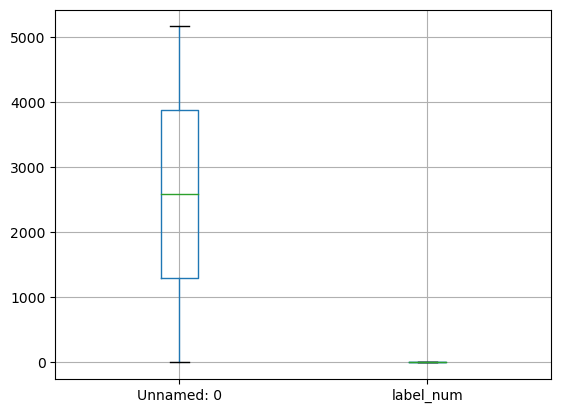

In [13]:
#plot the boxplot

df.boxplot()

In [14]:
df.hist()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'label_num'}>]], dtype=object)

## Selecting necessary columns

In this Dataset Unnamed: 0 is unnecessary column which have no use in Analysis. So we will drop some unnecessary columns.

In [15]:
# Dropping the column
df.drop('Unnamed: 0', axis=1 , inplace=True)
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [16]:
print(df['label'].value_counts())
print(df['label_num'].value_counts())

ham     3672
spam    1499
Name: label, dtype: int64
0    3672
1    1499
Name: label_num, dtype: int64


In label_num and label have same data. So, we will drop label_num column.

In [17]:
# Dropping 'label_num' Column
del df['label_num']
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


## Rename the columns

In [18]:
# Renaming Column Names
df.columns = ['Category','Subject']
df.columns

Index(['Category', 'Subject'], dtype='object')

## Category Column

In [19]:
df['Category'].unique() #for unique value

array(['ham', 'spam'], dtype=object)

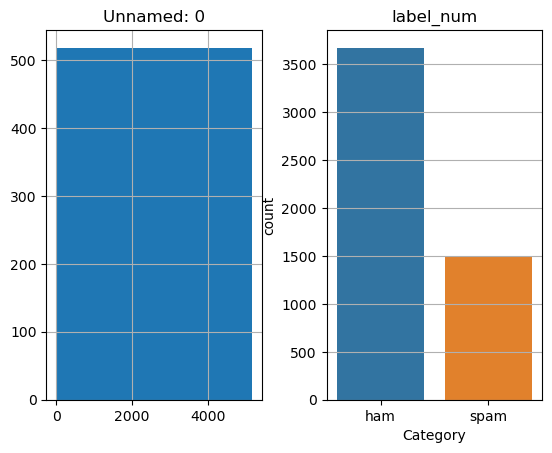

In [20]:
# Plotting Countplot for Category Column
sns.countplot(data = df , x = 'Category')
plt.show()

In [21]:
# check for duplicates
df.duplicated().sum()

178

In [22]:
# Dropping Duplicated Values
df.drop_duplicates()

,Category,Subject
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


In category column there are 2types:
1. Ham:- Emails that are not spam
2. Spam:- Emails that are spam

## Labelling ham as a 1 and spam as a 0 in category column

In [23]:
# labelling ham and spam for linear regression
df.loc[df['Category'] == 'spam', 'Category',] = 1
df.loc[df['Category'] == 'ham', 'Category',] = 0
df

,Category,Subject
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,0,Subject: put the 10 on the ft\r\nthe transport...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,0,Subject: calpine daily gas nomination\r\n>\r\n...
5169,0,Subject: industrial worksheets for august 2000...


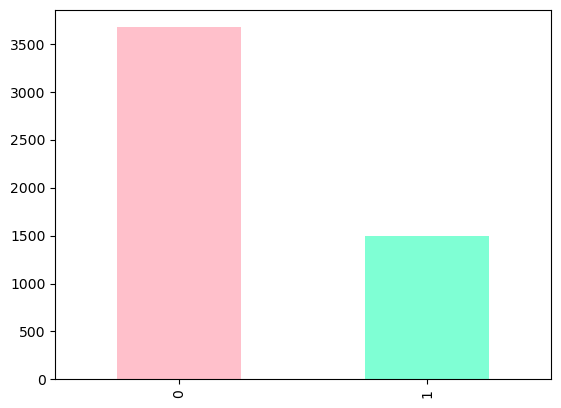

In [24]:
# Plotting barplot for Count of Category Column
df['Category'].value_counts().plot(kind='bar',color=('pink','aquamarine'), layout='constrained')
plt.show()

## Subject Column

In [25]:
# Showing first row of Subject column 
df['Subject'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

Every Row of this Column has lower case and special characters in a data. So first we will convert the text into lower case and then we will clean the data by removing all these special characters.

For Removing this we use the RegexpTokenizer function from the Natural Language Toolkit (NLTK) library to tokenize the string using the regular expression pattern.

In [26]:
from nltk.tokenize import RegexpTokenizer

In [27]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower() #converting string into lowercase
    tokens = reg.tokenize(string) # tokenize the string on the defined pattern
    return " ".join(tokens) # joining the tokens with single space character and returning the output

In [28]:
# Applying lambda function for changing the data of 'Subject' Column
df['Subject'] = df['Subject'].apply(lambda string: clean_str(string))

In [29]:
df['Subject'][0]

'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [30]:
df.head()

,Category,Subject
0,0,subject enron methanol meter this is a follow ...
1,0,subject hpl nom for january see attached file ...
2,0,subject neon retreat ho ho ho we re around to ...
3,1,subject photoshop windows office cheap main tr...
4,0,subject re indian springs this deal is to book...


In [31]:
X = df['Category']

Y = df['Subject']

In [32]:
print(X)

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: Category, Length: 5171, dtype: object


In [33]:
print(Y)

0       subject enron methanol meter this is a follow ...
1       subject hpl nom for january see attached file ...
2       subject neon retreat ho ho ho we re around to ...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal is to book...
                              ...                        
5166    subject put the on the ft the transport volume...
5167    subject and following noms hpl can t take the ...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets for august activ...
5170    subject important online banking alert dear va...
Name: Subject, Length: 5171, dtype: object


## Spilting the data into testing and training data

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [36]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


In [37]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

min_df is tell the model that what is the minimum frequency for a word to consider.                       
stop_words is a inbuilt function which is used to tell the model to remove the basic words like the, as, a, in etc.       
lowercase is used to lowercase all letters in the mail.


In [38]:
Y_train_featured = feature_extraction.fit_transform(Y_train)
Y_test_featured = feature_extraction.transform(Y_test)

In [39]:
print(Y_train)

3628    subject meter scherlyn per our conversation he...
2491    subject natural gas nomination for enron metha...
3262    subject cleburne outage gentlemen i wanted to ...
2972    subject daren the firm trading waha book has b...
2481    subject re mon feb page loading image not show...
                              ...                        
4931    subject re pretty boy wants to meet his soulma...
3264    subject if you need to make money learn from t...
1653    subject find out where to buy drugs cheap find...
2607    subject job survey and matching heather darren...
2732    subject forwarded by tom acton corp enron on p...
Name: Subject, Length: 4136, dtype: object


In [40]:
# Text is successfully converted into the numerical form
print(Y_train_featured)

  (0, 34843)	0.209674553125394
  (0, 17597)	0.21749164358073084
  (0, 35016)	0.25752744732861527
  (0, 24052)	0.14133037133722523
  (0, 12362)	0.23041955710463574
  (0, 21064)	0.18690079795641928
  (0, 20012)	0.12219812145536768
  (0, 20732)	0.1316413681304691
  (0, 31462)	0.25306377591220497
  (0, 34391)	0.17408496520088396
  (0, 8128)	0.16346769341772793
  (0, 23933)	0.18952860841730024
  (0, 21914)	0.18797819133930524
  (0, 13535)	0.21436091487202985
  (0, 23262)	0.21360930091171546
  (0, 8188)	0.2691224181448108
  (0, 30756)	0.41209823477907254
  (0, 22615)	0.4167946496245476
  (0, 33287)	0.04772650009362891
  (1, 26953)	0.12968696823568582
  (1, 23312)	0.16840793303087576
  (1, 23480)	0.1892561946689478
  (1, 11794)	0.19616932840527507
  (1, 9379)	0.19252222664107874
  (1, 23050)	0.2038437513299149
  :	:
  (4135, 15758)	0.12162838130188036
  (4135, 389)	0.26723642070815484
  (4135, 28828)	0.10925795588389492
  (4135, 23260)	0.08506967613644434
  (4135, 32084)	0.1104144485252494
  

## Logistics Regression

In [41]:
model = LogisticRegression()

In [42]:
# Training the Logistic Regression model
model.fit(Y_train_featured,X_train)

LogisticRegression()

##  Prediction on Training Data and Checking the Accuracy of the Model

In [43]:
Prediction_on_train_data = model.predict(Y_train_featured)
accuracy_on_train_data = accuracy_score(X_train,Prediction_on_train_data)
print('Accuracy_on_train_data : ', accuracy_on_train_data*100)

Accuracy_on_train_data :  99.63733075435202


## Prediction on Test Data and Checking the Accuracy of the Model

In [44]:
Prediction_on_test_data = model.predict(Y_test_featured)
accuracy_on_test_data = accuracy_score(X_test,Prediction_on_test_data)
print('Accuracy_on_test_data : ',accuracy_on_test_data*100)

Accuracy_on_test_data :  98.74396135265701


#### Accuracy on test data is 98.74% i.e. Model is performing good.

--------------------------------------------------------------------------

## Building a Predictive System

Mail Predicting

In [45]:
## mail from dataset
mail=["photoshop windows office cheap main tr..."]
predict=feature_extraction.transform(mail)
final_prediction=model.predict(predict)
print(final_prediction)
if final_prediction[0]==0:
  print("Ham Mail")
else:
  print("Spam Mail")

[1]
Spam Mail


In [46]:
## mail from user input
Mail1 = [input("Paste the text of the mail here : ")] 

predict=feature_extraction.transform(Mail1)
final_prediction=model.predict(predict)
print(final_prediction)
if final_prediction[0]==0:
  print("Ham Mail")
else:
  print("Spam Mail")

Paste the text of the mail here : neon retreat ho ho ho we re around to ...
[0]
Ham Mail


##  -----------------------------------------------------------------